<a href="https://colab.research.google.com/github/VinuthaVM/Domain-tasks/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load datasets
test = pd.read_csv('/content/sample_data/california_housing_train.csv')
train= pd.read_csv('/content/sample_data/california_housing_test.csv')


In [ ]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
train=train.append(test)
train

<ipython-input-6-274f6611569d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train=train.append(test)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [ ]:
train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

<ipython-input-9-fc7118a942db>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['median_house_value']);


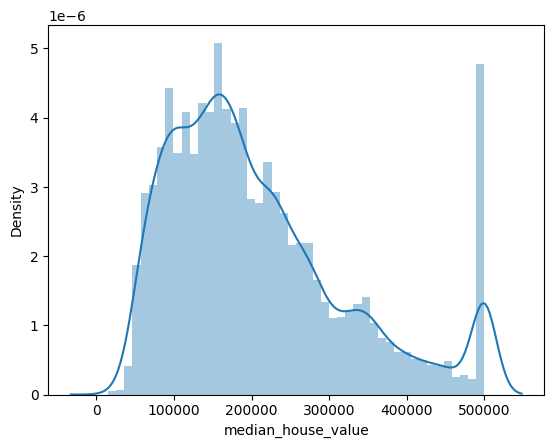

In [ ]:
sns.distplot(train['median_house_value']);

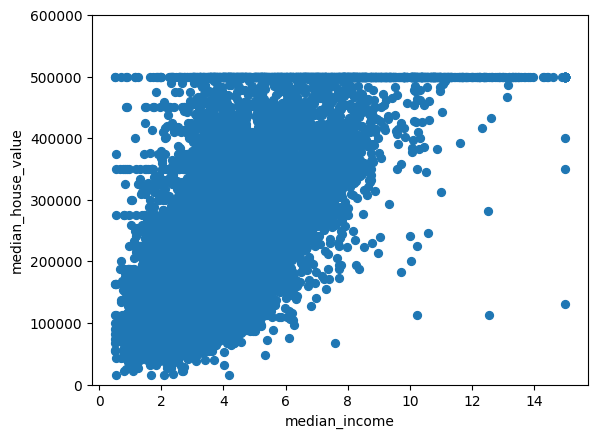

In [ ]:
var='median_income'
data=pd.concat([train['median_house_value'],train[var]],axis=1)
data.plot.scatter(x=var,y='median_house_value',ylim=(0,600000),s=32);


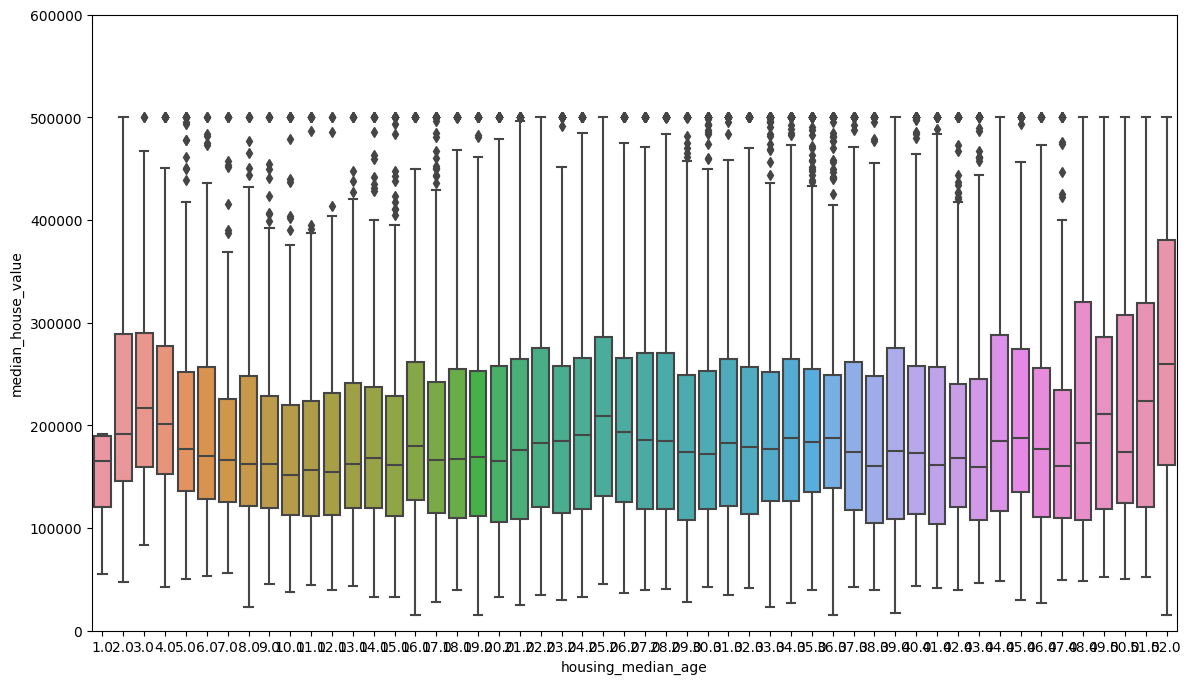

In [ ]:
var='housing_median_age'
data=pd.concat([train['median_house_value'],train[var]],axis=1)
f,ax=plt.subplots(figsize=(14,8))
fig=sns.boxplot(x=var,y="median_house_value",data=data)
fig.axis(ymin=0,ymax=600000);

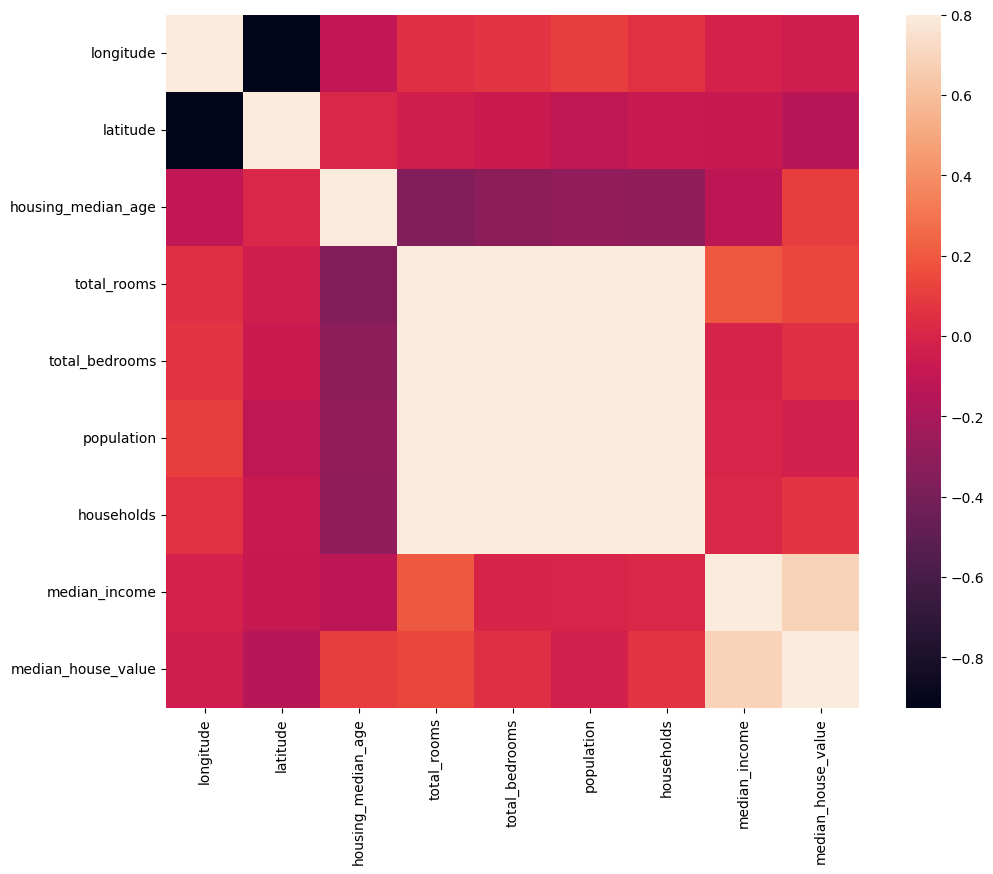

In [ ]:
corrmat=train.corr()
f, ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True);

<Figure size 1000x1000 with 0 Axes>

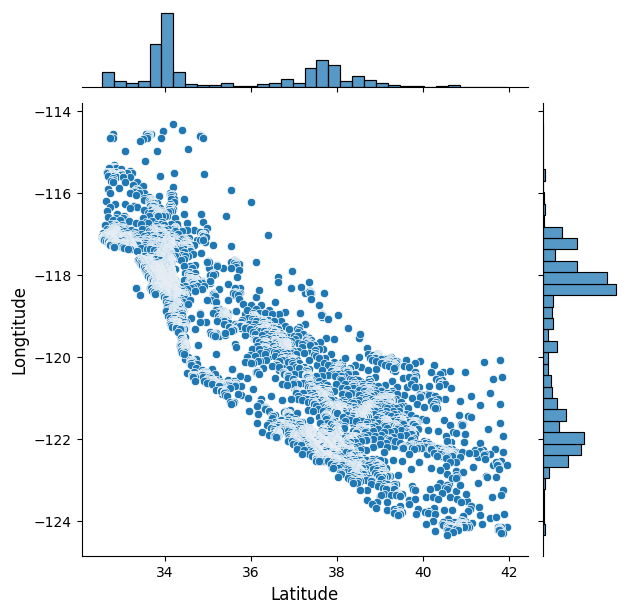

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=train.latitude.values,y=train.longitude.values,sizes=10)
plt.ylabel('Longtitude',fontsize=12)
plt.xlabel('Latitude',fontsize=12)
plt.show()
sns.despine

In [ ]:
y=train.median_house_value.values
x=train.drop(['median_house_value'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
# split into validation and training data
x_train, x_val, y_train, y_val=train_test_split(x,y,test_size=0.1,random_state=1)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((18000, 8), (2000, 8), (18000,), (2000,))

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
model= HistGradientBoostingRegressor(max_iter=3000,random_state=1).fit(x_train,y_train)
print(model.score(x_train,y_train))


/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9094391413351691


In [ ]:

from sklearn.metrics import r2_score
y_pred=model.predict(x_val)
y_pred[y_pred<0]=0
print("Root mean squared error:")
print(model.score(x_val,y_val))
print("R2 score:")
print(r2_score(y_pred,model.predict(x_val)))


Root mean squared error:
0.856090417274662
R2 score:
1.0


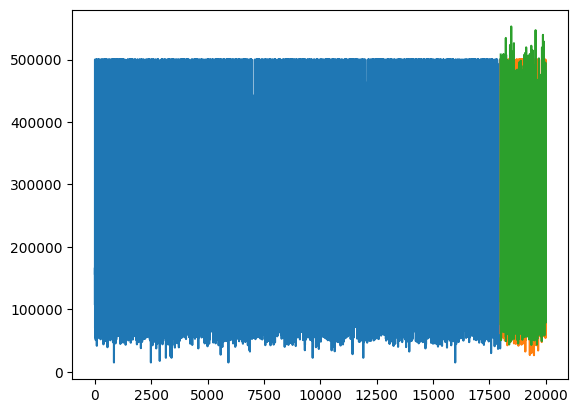

In [ ]:

from matplotlib import pyplot
pyplot.plot(y_train)
pyplot.plot([None for i in y_train]+[x for x in y_val])
pyplot.plot([None for i in y_train]+[x for x in y_pred])
pyplot.show()

In [ ]:
df_val=pd.DataFrame({'actual_value':y_val,'predicted_value':y_pred})
df_val.reset_index(drop=True,inplace=True)
df_val

,actual_value,predicted_value
0,500001.0,508054.115029
1,430900.0,347160.030476
2,110900.0,142138.440695
3,60600.0,75383.673411
4,176000.0,229027.156293
...,...,...
1995,88600.0,148598.729245
1996,240000.0,222657.042316
1997,157100.0,168646.692414
1998,450000.0,339028.015994


Text(0.5, 1.0, 'Actual price vs Predicted price')

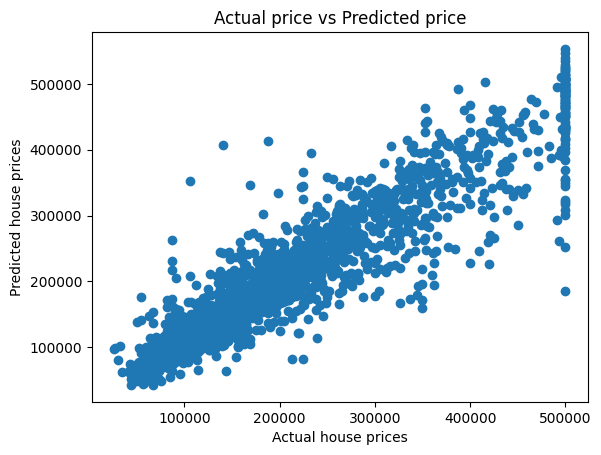

In [ ]:
plt.scatter(y_val,y_pred)
plt.xlabel("Actual house prices")
plt.ylabel("Predicted house prices")
plt.title("Actual price vs Predicted price")